In [49]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [50]:
#download data
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

--2020-06-25 17:06:04--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  36.18K  --.-KB/s    in 0.01s   

2020-06-25 17:06:04 (2.71 MB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



**Data Exploration**

In [51]:
#obtain the data from csv file
data=pd.read_csv('/content/teleCust1000t.csv')
data.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [52]:
data.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [53]:
data.shape

(1000, 12)

In [54]:
data.isna().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [55]:
data.groupby('custcat').size()

custcat
1    266
2    217
3    281
4    236
dtype: int64

**Data Visualisation**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd2db0ff98>]],
      dtype=object)

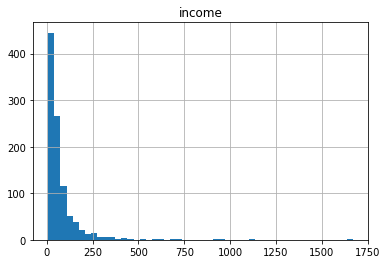

In [56]:
data.hist(column='income',bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd2a403cf8>,
      dtype=object)

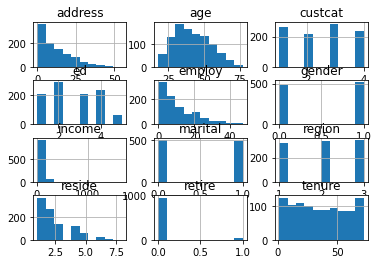

In [57]:
data.hist()

**Feature Set**

In [58]:
data.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [59]:
x=data.iloc[:, :11].astype('float32')
x

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2.0,13.0,44.0,1.0,9.0,64.0,4.0,5.0,0.0,0.0,2.0
1,3.0,11.0,33.0,1.0,7.0,136.0,5.0,5.0,0.0,0.0,6.0
2,3.0,68.0,52.0,1.0,24.0,116.0,1.0,29.0,0.0,1.0,2.0
3,2.0,33.0,33.0,0.0,12.0,33.0,2.0,0.0,0.0,1.0,1.0
4,2.0,23.0,30.0,1.0,9.0,30.0,1.0,2.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,10.0,39.0,0.0,0.0,27.0,3.0,0.0,0.0,1.0,3.0
996,1.0,7.0,34.0,0.0,2.0,22.0,5.0,5.0,0.0,1.0,1.0
997,3.0,67.0,59.0,0.0,40.0,944.0,5.0,33.0,0.0,1.0,1.0
998,3.0,70.0,49.0,0.0,18.0,87.0,2.0,22.0,0.0,1.0,1.0


In [34]:
y=data.iloc[:, 11].astype('float32')
y

0      1.0
1      4.0
2      3.0
3      1.0
4      3.0
      ... 
995    1.0
996    1.0
997    4.0
998    3.0
999    2.0
Name: custcat, Length: 1000, dtype: float32

**Normalisation**

In [38]:
x=preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.02696767, -1.05512499,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.59412259, -0.22207643, -1.03459815,
        -0.23065004],
       [ 1.19883557, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644973,  1.90622709, -0.59412259, -0.22207643, -1.03459815,
         2.55666162],
       [ 1.19883557,  1.52109247,  0.821826  ,  1.0100505 ,  1.23481935,
         0.35951747, -1.36767088,  1.787528  , -0.22207643,  0.96655882,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919638, -1.09029979, -0.22207643,  0.96655882,
        -0.92747796],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182891, -0.22207643, -1.03459815,
         1.16300579]])

In [46]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=4)
xtrain.shape

(800, 11)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
mean_acc=[]
for k in range(1,10):
  model= KNeighborsClassifier(n_neighbors = k).fit(xtrain,ytrain)
  ypred=model.predict(xtest)
  print('---')
  print("Train accuracy: ",accuracy_score(ytrain,model.predict(xtrain)))
  print("Test accuracy: ",accuracy_score(ytest,ypred))
  mean_acc.append(accuracy_score(ytest,ypred))

---
Train accuracy:  1.0
Test accuracy:  0.3
---
Train accuracy:  0.6175
Test accuracy:  0.29
---
Train accuracy:  0.56875
Test accuracy:  0.315
---
Train accuracy:  0.5475
Test accuracy:  0.32
---
Train accuracy:  0.5375
Test accuracy:  0.315
---
Train accuracy:  0.51625
Test accuracy:  0.31
---
Train accuracy:  0.5125
Test accuracy:  0.335
---
Train accuracy:  0.4925
Test accuracy:  0.325
---
Train accuracy:  0.5025
Test accuracy:  0.34
